##  Happiness 

In this notebook I will be analysing & exploring the World Happiness Index 2021, and the historic World Happiness Index scores from 2005.

I hope to learn a few things along the way, and I hope anyone reading this will, too.

As an aside, I will bring in population data to investiagte if that has any obvious links to happiness levels.

I'll also explore if countries can improve their positions over time, or if the placings are more or less static.

Finally, I will formally cluster our data using K-means & the elbow method to see if we can group countires together based on their scores across the various metrics in the dataset.

In [1]:
!pip install pycountry

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings  

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.min_rows",None)

In [3]:
pop=pd.read_csv("population_by_country_2020.csv")
df=pd.read_csv("world-happiness-report-2021.csv")
df2=pd.read_csv("world-happiness-report.csv")
safety = df.copy()

In [4]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


**Checking the null values**

In [7]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [8]:
df2.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [9]:
pop.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

#### Here we have null values in the datasets so we are converting them to their respective mean values

In [10]:
mean1=df2["Log GDP per capita"].mean()
mean2=df2["Social support"].mean()
mean3=df2["Healthy life expectancy at birth"].mean()
mean4=df2["Freedom to make life choices"].mean()
mean5=df2["Generosity"].mean()
mean6=df2["Perceptions of corruption"].mean()
mean7=df2["Positive affect"].mean()
mean8=df2["Negative affect"].mean()

In [11]:
df2["Log GDP per capita"]=df2["Log GDP per capita"].replace(np.nan,mean1)
df2["Social support"]=df2["Social support"].replace(np.nan,mean2)
df2["Healthy life expectancy at birth"]=df2["Healthy life expectancy at birth"].replace(np.nan,mean2)
df2["Freedom to make life choices"]=df2["Freedom to make life choices"].replace(np.nan,mean2)
df2["Generosity"]=df2["Generosity"].replace(np.nan,mean2)
df2["Perceptions of corruption"]=df2["Perceptions of corruption"].replace(np.nan,mean2)
df2["Positive affect"]=df2["Positive affect"].replace(np.nan,mean2)
df2["Negative affect"]=df2["Negative affect"].replace(np.nan,mean2)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1949 non-null   float64
 4   Social support                    1949 non-null   float64
 5   Healthy life expectancy at birth  1949 non-null   float64
 6   Freedom to make life choices      1949 non-null   float64
 7   Generosity                        1949 non-null   float64
 8   Perceptions of corruption         1949 non-null   float64
 9   Positive affect                   1949 non-null   float64
 10  Negative affect                   1949 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [13]:
pop.describe()

,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,3.322744e+07,3.460878e+05,475.770213,5.535918e+05,6.283582
std,1.353034e+08,1.128260e+06,2331.285935,1.687796e+06,123291.887548
min,8.010000e+02,-3.838400e+05,0.000000,0.000000e+00,-653249.000000
25%,3.994905e+05,4.240000e+02,37.000000,2.545000e+03,-10047.000000
50%,5.460109e+06,3.917000e+04,95.000000,7.724000e+04,-852.000000
75%,2.067170e+07,2.496600e+05,239.500000,4.038200e+05,9741.000000
max,1.440298e+09,1.358663e+07,26337.000000,1.637687e+07,954806.000000


### Checking for outliers

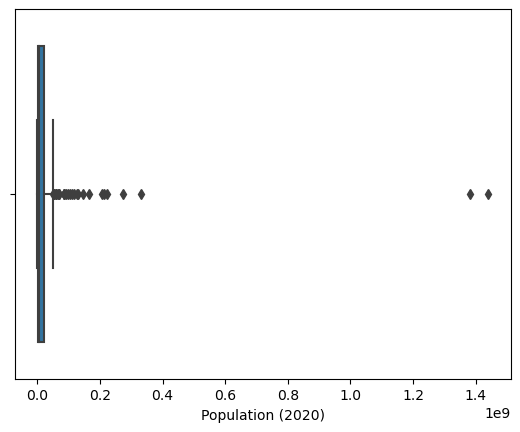

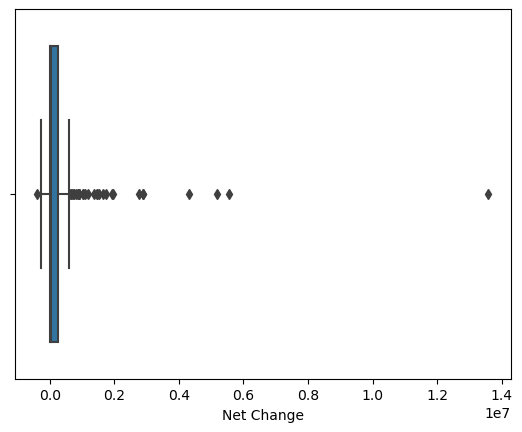

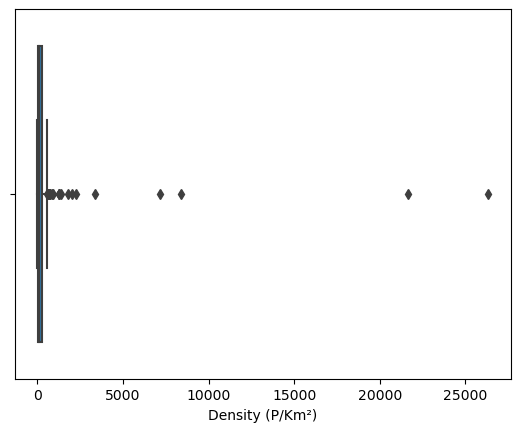

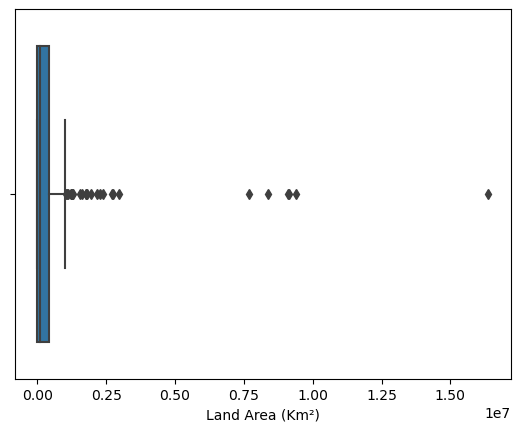

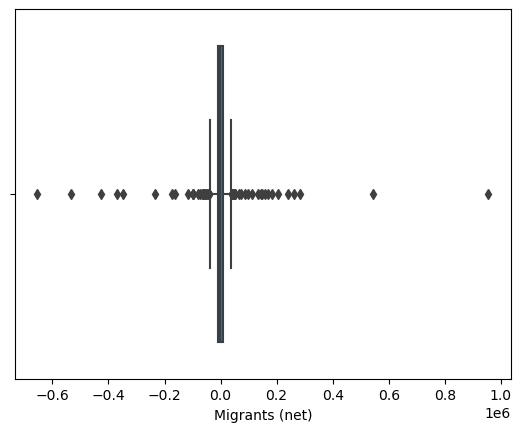

In [14]:
pop1=pop.select_dtypes(exclude=['object'])
for i in pop1:
    plt.figure()
    sns.boxplot(data=pop1,x=i)

#### Migrants column has the outliers to we remove the outliers by calling a function

In [15]:
def rem_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return lower,upper


In [16]:
lowincome,upincome=rem_outliers(pop["Migrants (net)"])
pop["Migrants (net)"]=np.where(pop["Migrants (net)"]>upincome,upincome,pop["Migrants (net)"])
pop["Migrants (net)"]=np.where(pop["Migrants (net)"]<lowincome,lowincome,pop["Migrants (net)"])

In [17]:
median1=pop["Migrants (net)"].median()
pop["Migrants (net)"]=pop["Migrants (net)"].replace(np.nan,median1)

In [18]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           235 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


Renaming the columns for easy access

In [19]:
df.rename(columns={'Country name': 'Country'}, inplace=True)
df2.rename(columns={'Country name': 'Country'}, inplace=True)
pop.rename(columns={'Country (or dependency)': 'Country'}, inplace=True)
temporal = df2.groupby(['year','Country'])['Life Ladder'].mean().unstack().T
temporal = temporal.fillna(0).astype(int)

In [20]:
# colours
low_c = 'blue'
high_c = 'Orange'
plt.rcParams["font.family"] = "monospace"

## Initial overview

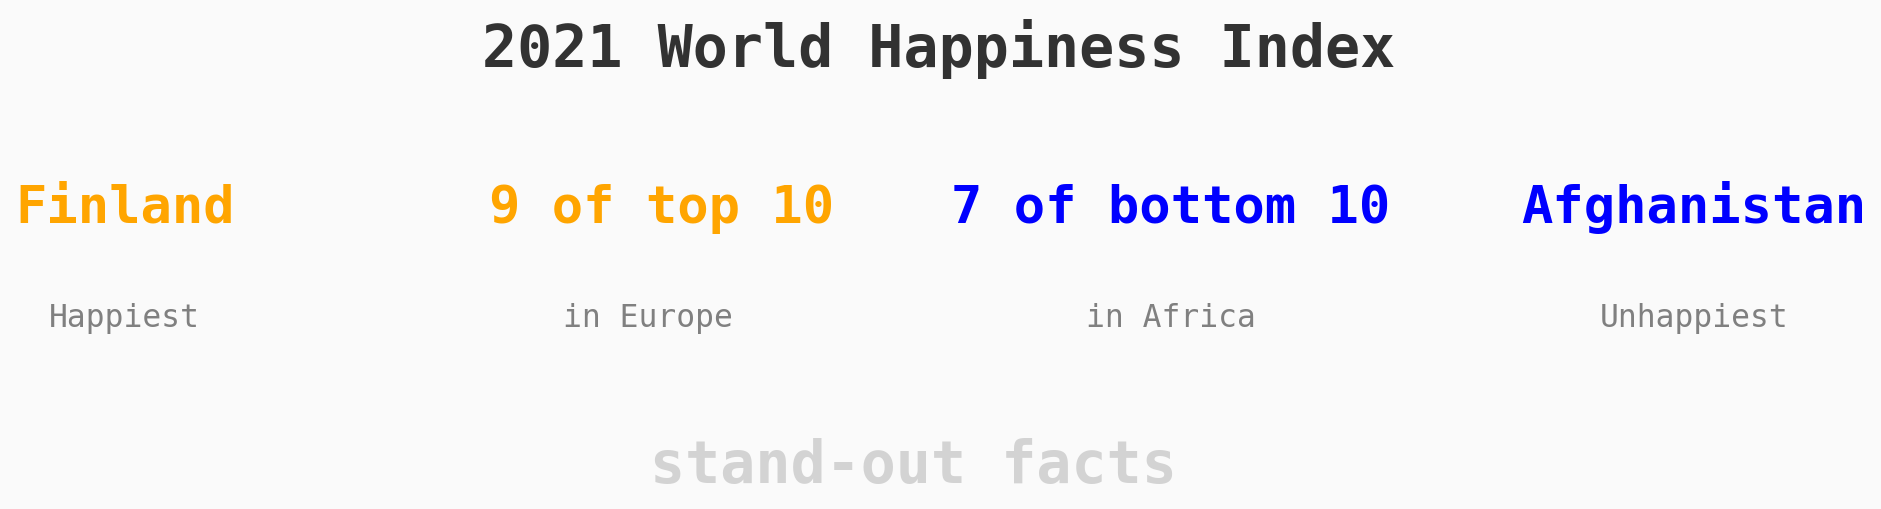

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,3), dpi=150)
ax0 = fig.add_subplot(1, 1, 1)

background_color = "#fafafa"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

ax0.text(1.167, 0.85, "2021 World Happiness Index", color='#323232', fontsize=28, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.13, -0.35, "stand-out facts", color='lightgray', fontsize=28, fontweight='bold', fontfamily='monospace', ha='center')

ax0.text(0, 0.4, "Finland", color=high_c, fontsize=25, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0, 0.1, "Happiest", color='gray', fontsize=15, fontfamily='monospace', ha='center')

ax0.text(0.77, 0.4, "9 of top 10", color=high_c, fontsize=25, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(0.75, 0.1, "in Europe", color='gray', fontsize=15, fontfamily='monospace', ha='center')

ax0.text(1.5, 0.4, "7 of bottom 10", color=low_c, fontsize=25, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(1.5, 0.1, "in Africa", color='gray', fontsize=15, fontfamily='monospace', ha='center')

ax0.text(2.25, 0.4, "Afghanistan", color=low_c, fontsize=25, fontweight='bold', fontfamily='monospace', ha='center')
ax0.text(2.25, 0.1, "Unhappiest", color='gray', fontsize=15, fontfamily='monospace', ha='center')

ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both', length=0)

for s in ['top', 'right', 'left', 'bottom']:
    ax0.spines[s].set_visible(False)

plt.show()


**What are the happiest countries in the world?**<br>
'Happiness' to me seems like an individual metric, something that is hard to generalise. However, some countries perform consistently well on the happiness index rankings.

We've also noted that 9 of the top 10 are in Europe, and that 7 of the bottom 10 are in Africa.

Let's see which countries top the list currently, and those that are at the bottom.

In [22]:
past_winners = df2.loc[df2.groupby("year")["Life Ladder"].idxmax()]
past_bottom = df2.loc[df2.groupby("year")["Life Ladder"].idxmin()]

hap = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]
unhap = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]
top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)

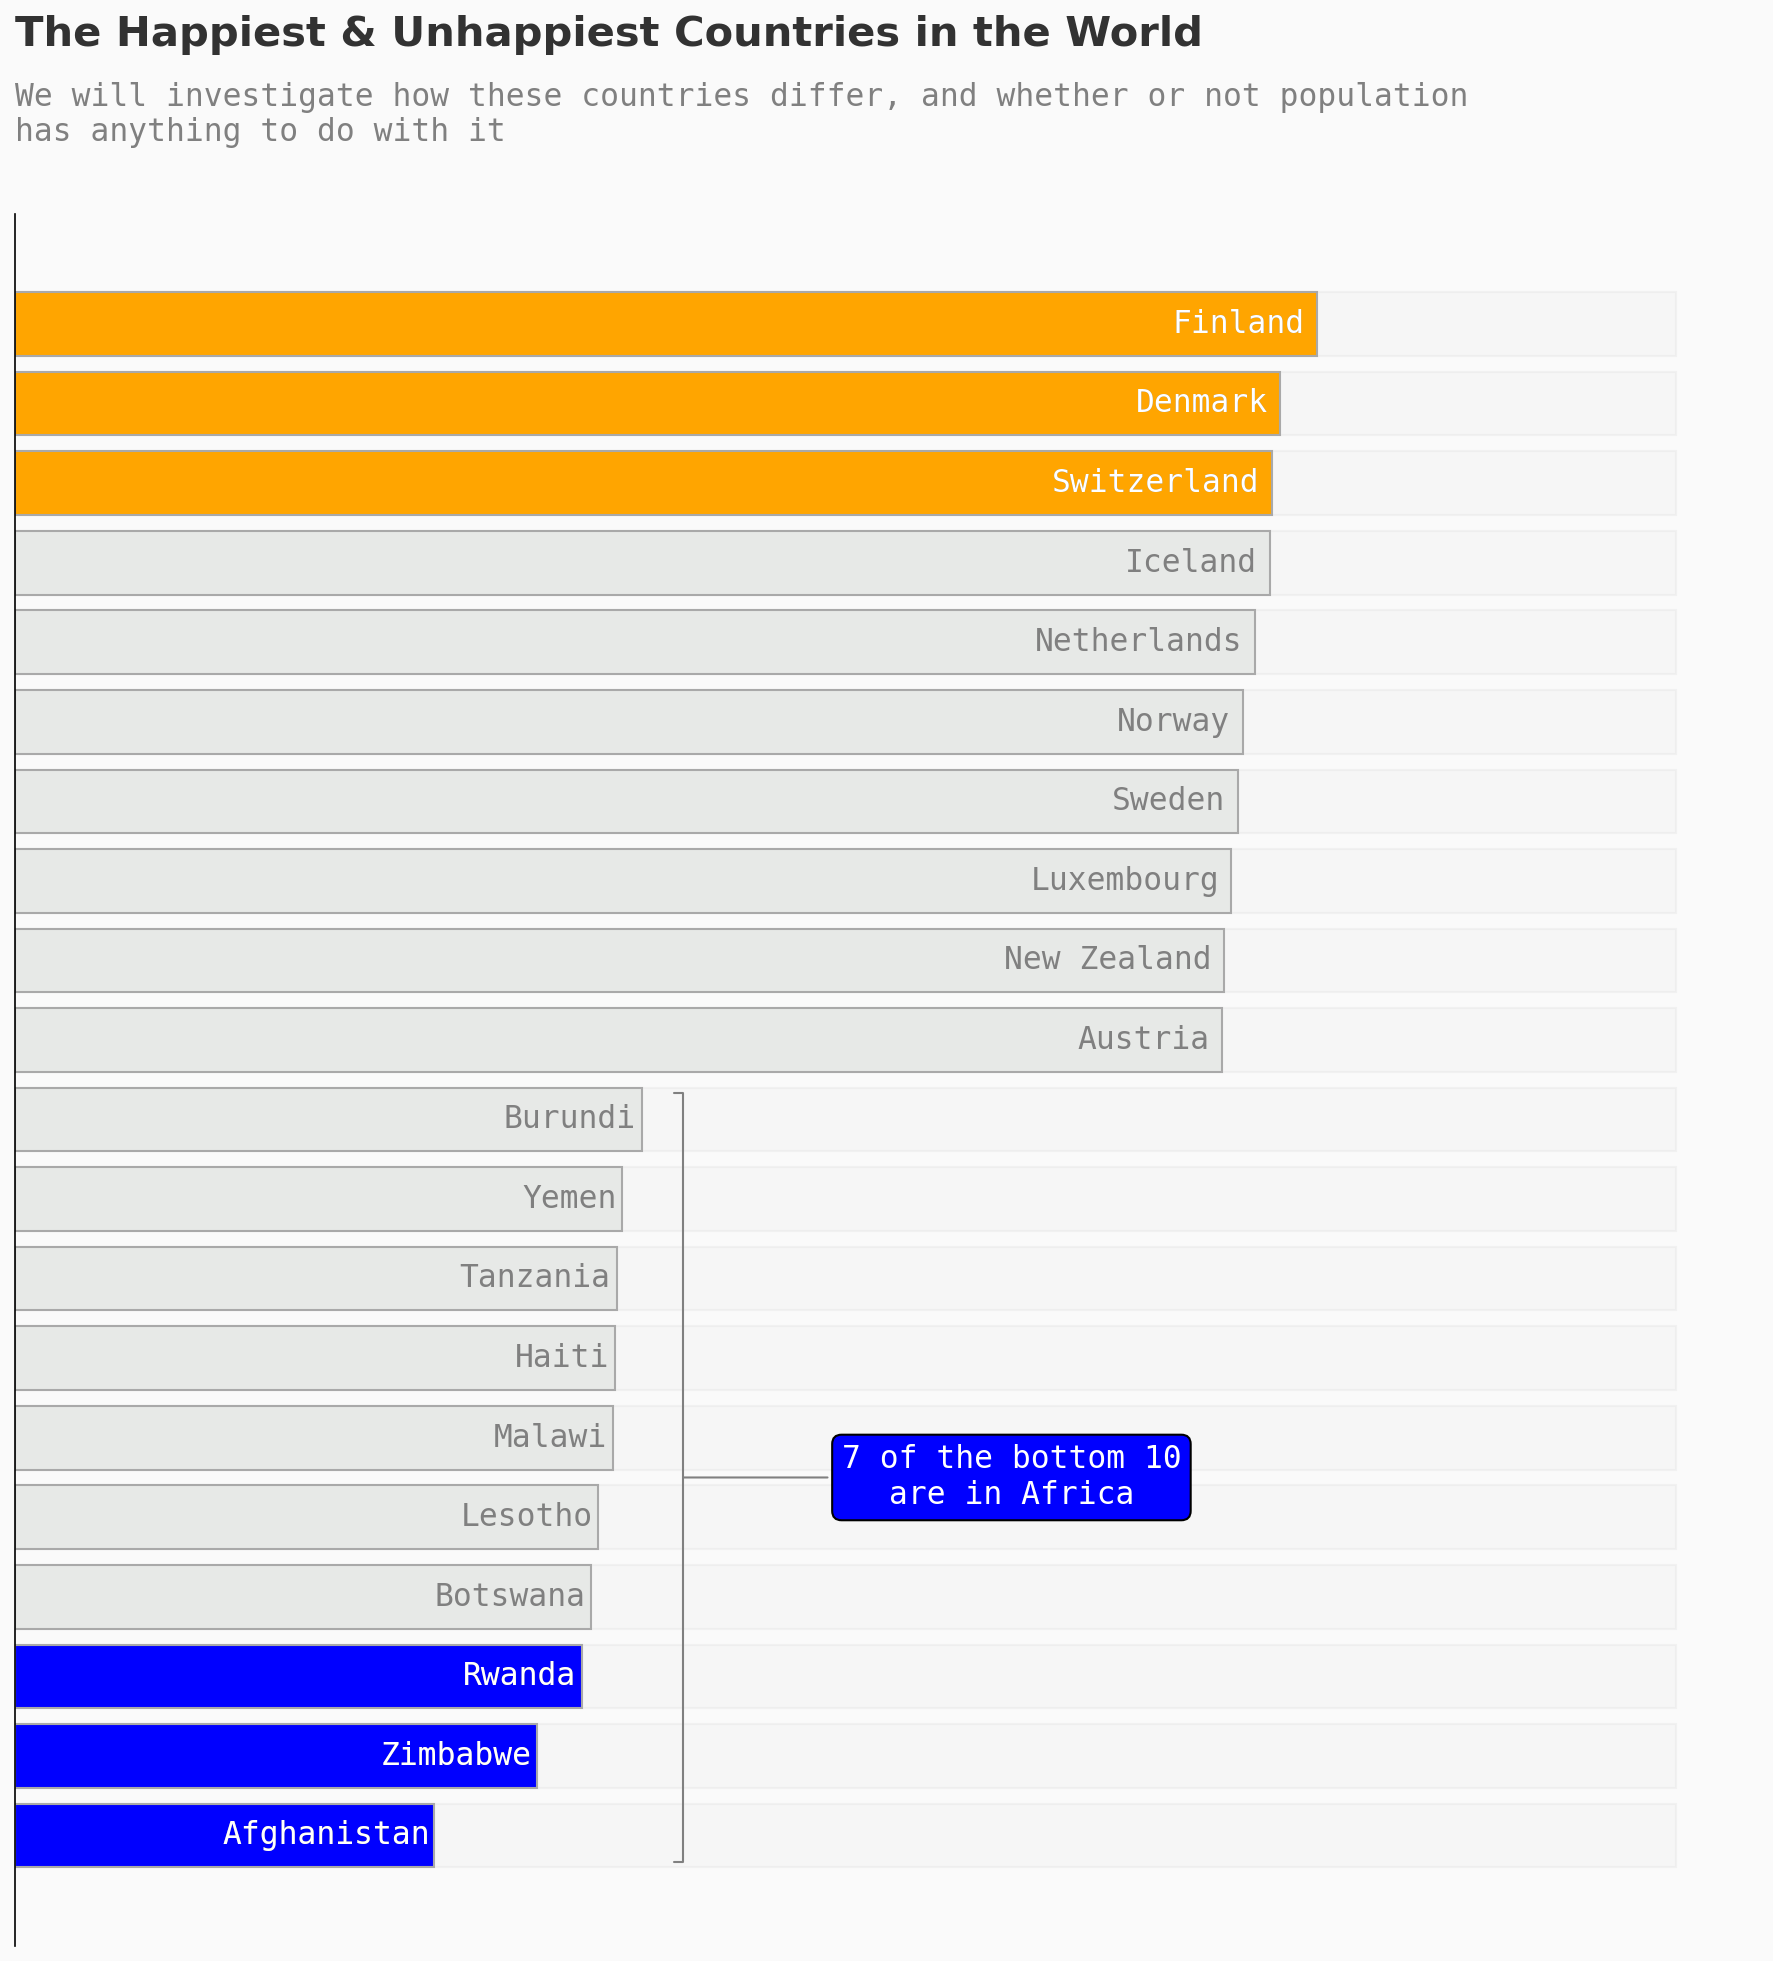

In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15), dpi=150)
ax0 = fig.add_subplot(1, 1, 1)

background_color = "#fafafa"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)

data = top_bottom

color_map = ['#e7e9e7' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] = low_c
color_map[17] = color_map[18] = color_map[19] = high_c

ax0.barh(data.index, 10, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax0.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(0, 20):
    ax0.annotate(list(data.index)[i], xy=(data[i] - (data[i] * 0.01), i), va='center', ha='right',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)

for i in range(0, 3):
    ax0.annotate(list(data.index)[i], xy=(data[i] - (data[i] * 0.01), i), va='center', ha='right',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

for i in range(17, 20):
    ax0.annotate(list(data.index)[i], xy=(data[i] - (data[i] * 0.01), i), va='center', ha='right',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

ax0.text(0, 22.5, 'The Happiest & Unhappiest Countries in the World', fontfamily='sans-serif', fontsize=20,
         fontweight='bold', color='#323232')
ax0.text(0, 21.3, 'We will investigate how these countries differ, and whether or not population\nhas anything to do with it',
         fontfamily='monospace', fontsize=15, fontweight='light', color='gray')

ax0.annotate('7 of the bottom 10\nare in Africa', xy=(4, 4.5), xytext=(6, 4.5), xycoords='data',
             fontsize=15, ha='center', va='center', fontfamily='monospace',
             bbox=dict(boxstyle='round', fc=low_c),
             arrowprops=dict(arrowstyle='-[, widthB=12.3, lengthB=0.3', lw=1, color='gray'), color='white')

plt.show()


Let's bring the top 10 and bottom 10 side by side. 

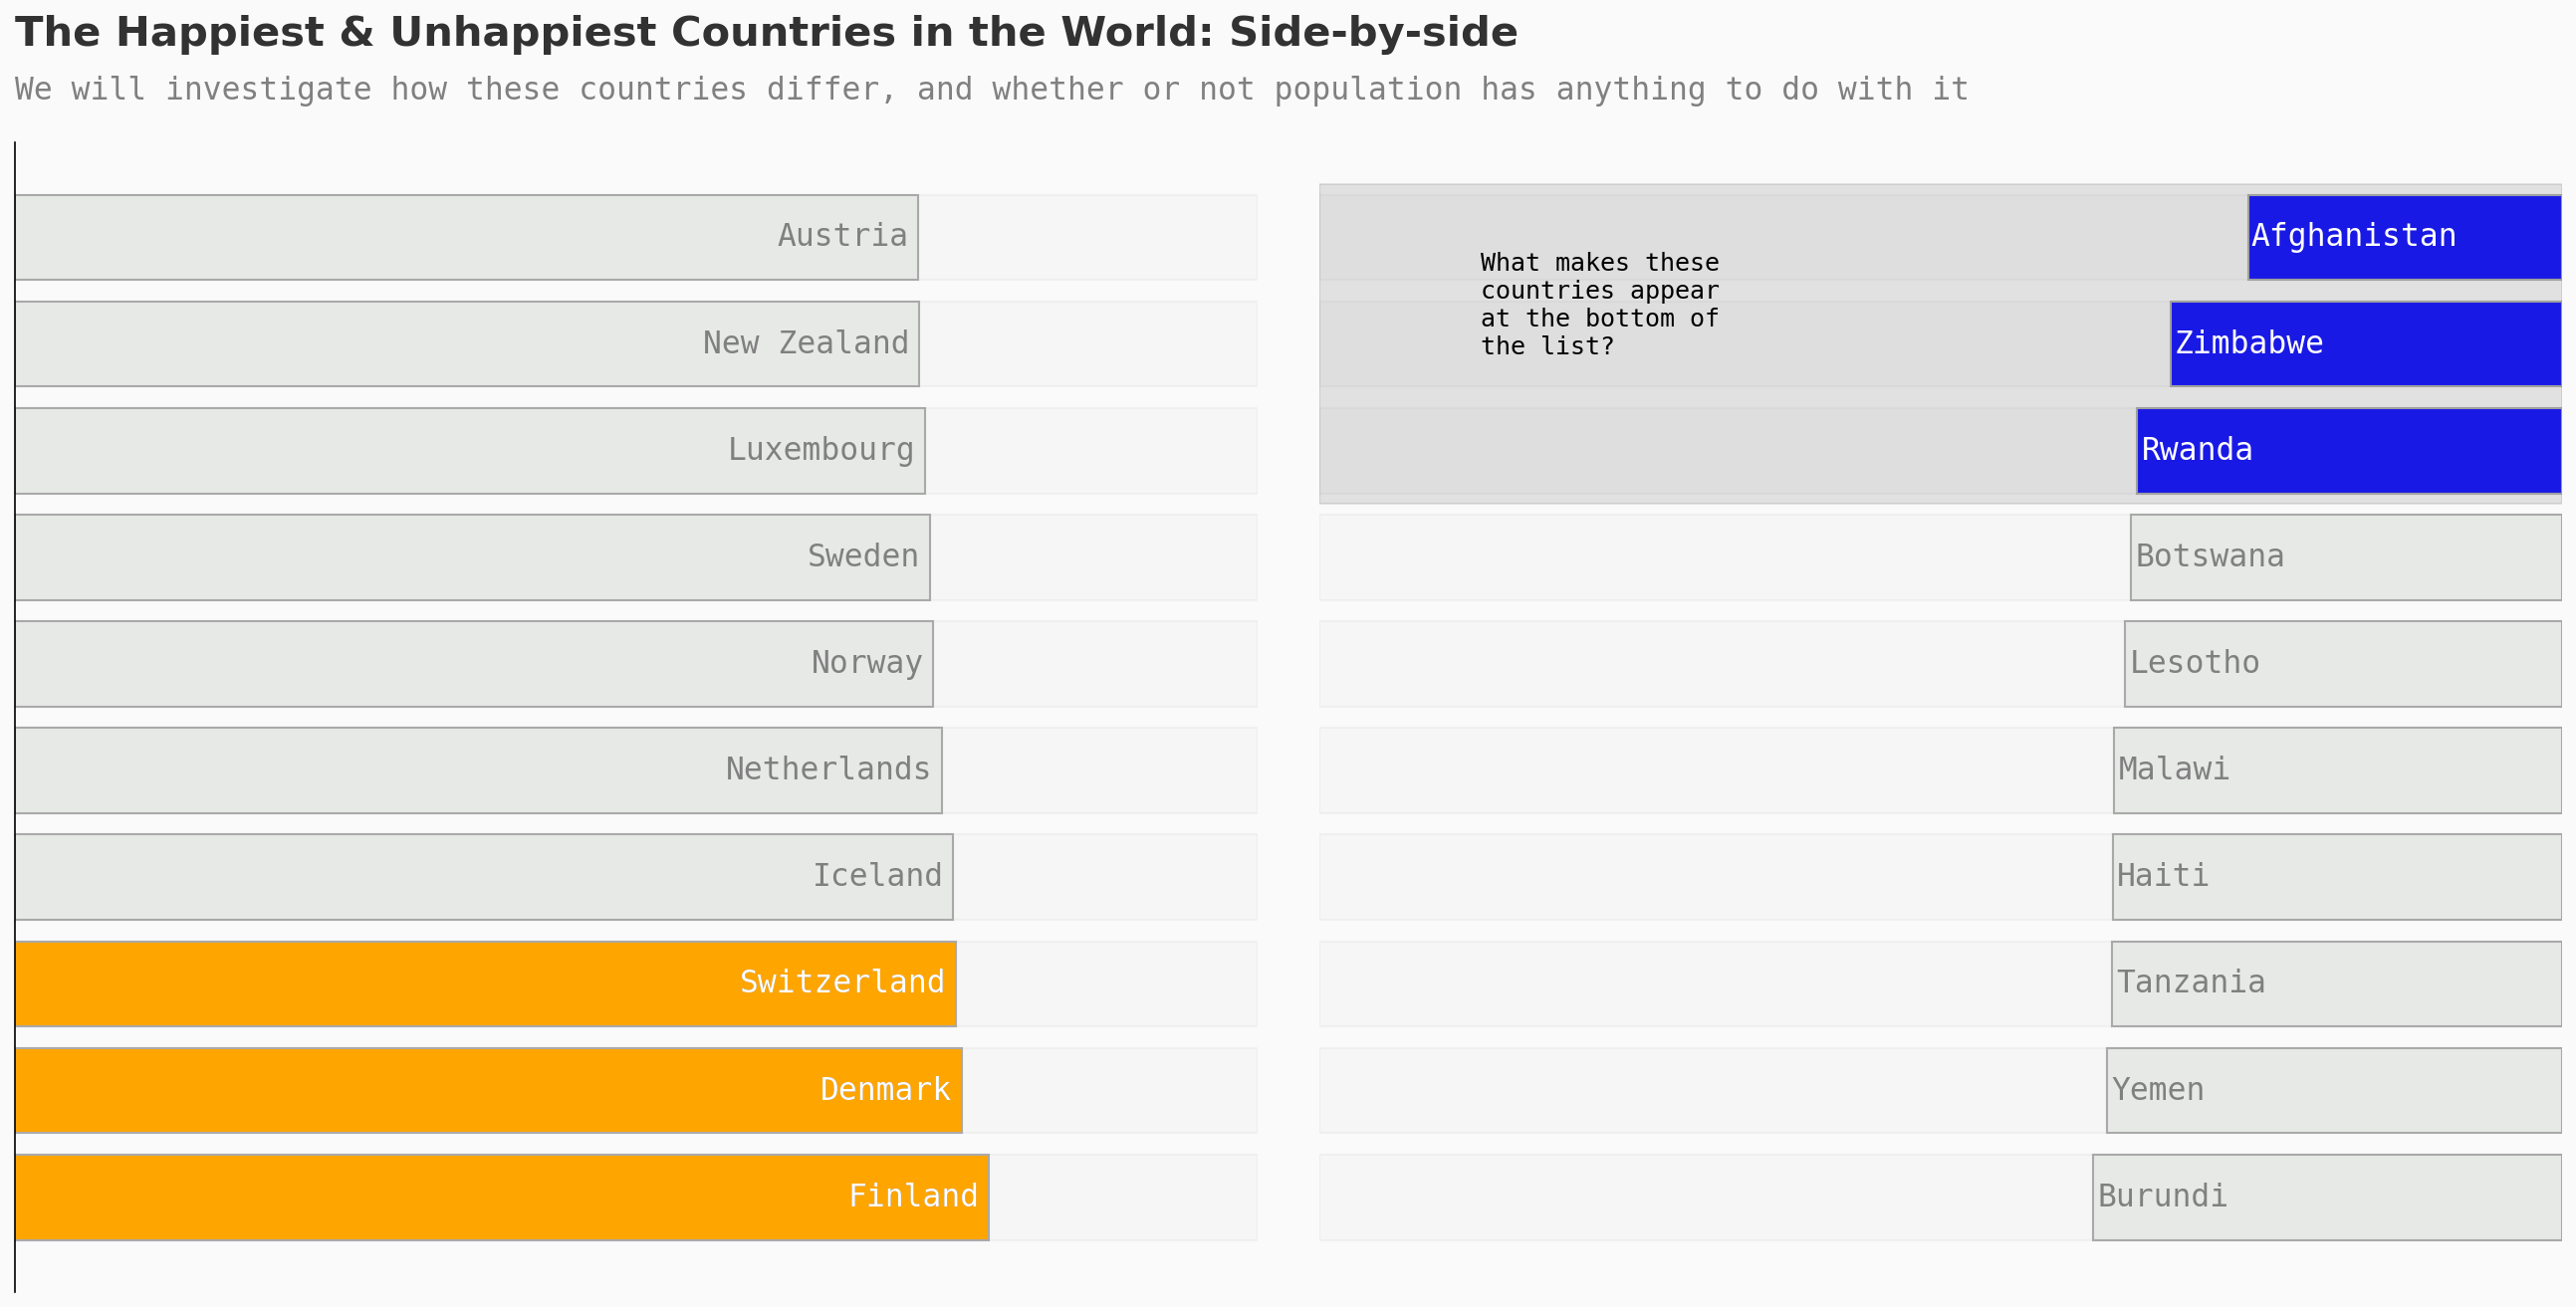

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(22, 10), dpi=150)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

background_color = "#fafafa"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# Happiest
data = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=False)[:10]
color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = high_c

ax0.barh(data.index, 10, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax0.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(0, 10):
    ax0.annotate(list(data.index)[i], xy=(data[i] - (data[i] * 0.01), i), va='center', ha='right',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)

for i in range(0, 3):
    ax0.annotate(list(data.index)[i], xy=(data[i] - (data[i] * 0.01), i), va='center', ha='right',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

# Unhappiest
data = df.groupby('Country')['Ladder score'].mean().sort_values(ascending=True)[:10]
color_map = ['#e7e9e7' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = low_c

ax1.barh(data.index[::-1], 10, edgecolor='darkgray', color='lightgray', alpha=0.1)
ax1.barh(data.index, data, edgecolor='darkgray', color=color_map)

for i in range(7, 10):
    ax1.annotate(list(data.index)[::-1][i], xy=(data[::-1][i] - (data[::-1][i] * 0.01), i), va='center', ha='left',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='white', rotation=0)

for i in range(0, 7):
    ax1.annotate(list(data.index)[::-1][i], xy=(data[::-1][i] - (data[::-1][i] * 0.01), i), va='center', ha='left',
                 fontweight='light', fontfamily='monospace', fontsize=15, color='gray', rotation=0)

for s in ['top', 'bottom', 'right']:
    ax0.spines[s].set_visible(False)

for s in ['top', 'bottom', 'right', 'left']:
    ax1.spines[s].set_visible(False)

ax0.set_xlim(0, 10)
ax1.set_xlim(10, 0)
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])

ax0.text(0, 10.8, 'The Happiest & Unhappiest Countries in the World: Side-by-side', fontfamily='sans-serif',
         fontsize=20, fontweight='bold', color='#323232')
ax0.text(0, 10.3, 'We will investigate how these countries differ, and whether or not population has anything to do with it',
         fontfamily='monospace', fontsize=15, fontweight='light', color='gray')

ax1.add_patch(Rectangle((0, 6.5), 10, 3, alpha=0.2, edgecolor='gray', facecolor='gray'))

fig.text(0.53, 0.72,
         '''
         What makes these 
         countries appear 
         at the bottom of
         the list?
         ''', color='black', fontfamily='monospace', fontsize=12)

plt.show()


An additional observation is that the countries in Europe in the top 10 are Northern European.

In [25]:
happiness_mean = df['Ladder score'].mean()

df['lower_happy'] = df['Ladder score'].apply(lambda x: 0 if x < happiness_mean else 1)

Now, let's look at the top 20 countries over the years.

This plot shows all scores from 2005 through to the present for the top 20 countries, with their Mean score and their 2021 scores hihglighted specifically.

It's remarkable that many countries 2021 score is higher than their mean, despite the pandemic.

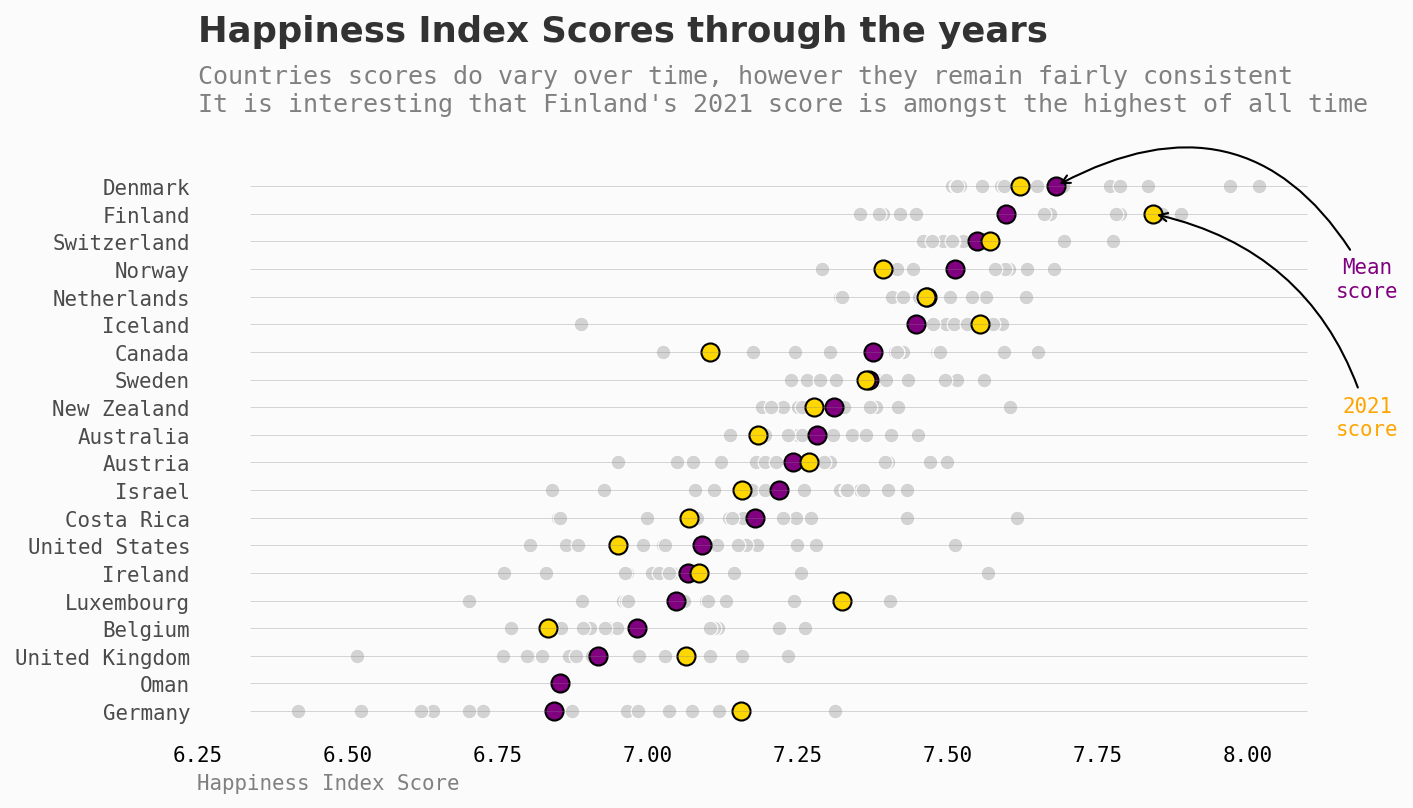

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

background = "#fbfbfb"
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
fig.patch.set_facecolor(background)
ax.set_facecolor(background)

top_list_ = df2.groupby('Country')['Life Ladder'].mean().sort_values(ascending=False).reset_index()[:20].sort_values(by='Life Ladder',ascending=True)

plot = 1
for country in top_list_['Country']:
    mean = df2[df2['Country'] == country].groupby('Country')['Life Ladder'].mean()
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x='Life Ladder', color='lightgray', s=50, ax=ax)
    sns.scatterplot(data=df2[df2['Country'] == country], y=plot, x=mean, color='Purple', ec='black', linewidth=1, s=75, ax=ax)
    sns.scatterplot(data=df[df['Country'] == country], y=plot, x='Ladder score', color='gold', ec='black', linewidth=1, s=75, ax=ax)
    plot += 1

ax.set_yticks(top_list_.index + 1)
ax.set_yticklabels(top_list_['Country'][::-1], fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set_xlabel("Happiness Index Score", fontfamily='monospace', loc='left', color='gray')

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.hlines(y=top_list_.index + 1, xmin=Xstart, xmax=Xend, color='gray', alpha=0.5, linewidth=.3, linestyles='-')
ax.set_axisbelow(True)

ax.text(6.25, Yend + 4.3, 'Happiness Index Scores through the years', fontsize=17, fontweight='bold',
        fontfamily='sans serif', color='#323232')
ax.text(6.25, Yend + 0.75, '''
Countries scores do vary over time, however they remain fairly consistent
It is interesting that Finland's 2021 score is amongst the highest of all time
''', fontsize=12, fontweight='light', fontfamily='monospace', color='gray')

plt.annotate('2021\nscore', xy=(7.842, 19), xytext=(8.2, 11),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3,rad=.3"),
             fontsize=10, fontfamily='monospace', ha='center', color=high_c)
plt.annotate('Mean\nscore', xy=(7.6804, 20), xytext=(8.2, 16),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3,rad=.5"),
             fontsize=10, fontfamily='monospace', ha='center', color='Purple')

plt.show()


#### Why are there differences?
We now understand that Northern European nations top the list, and have done for some time.

Let's explore these differences between Europe and the rest of the world a little more closely

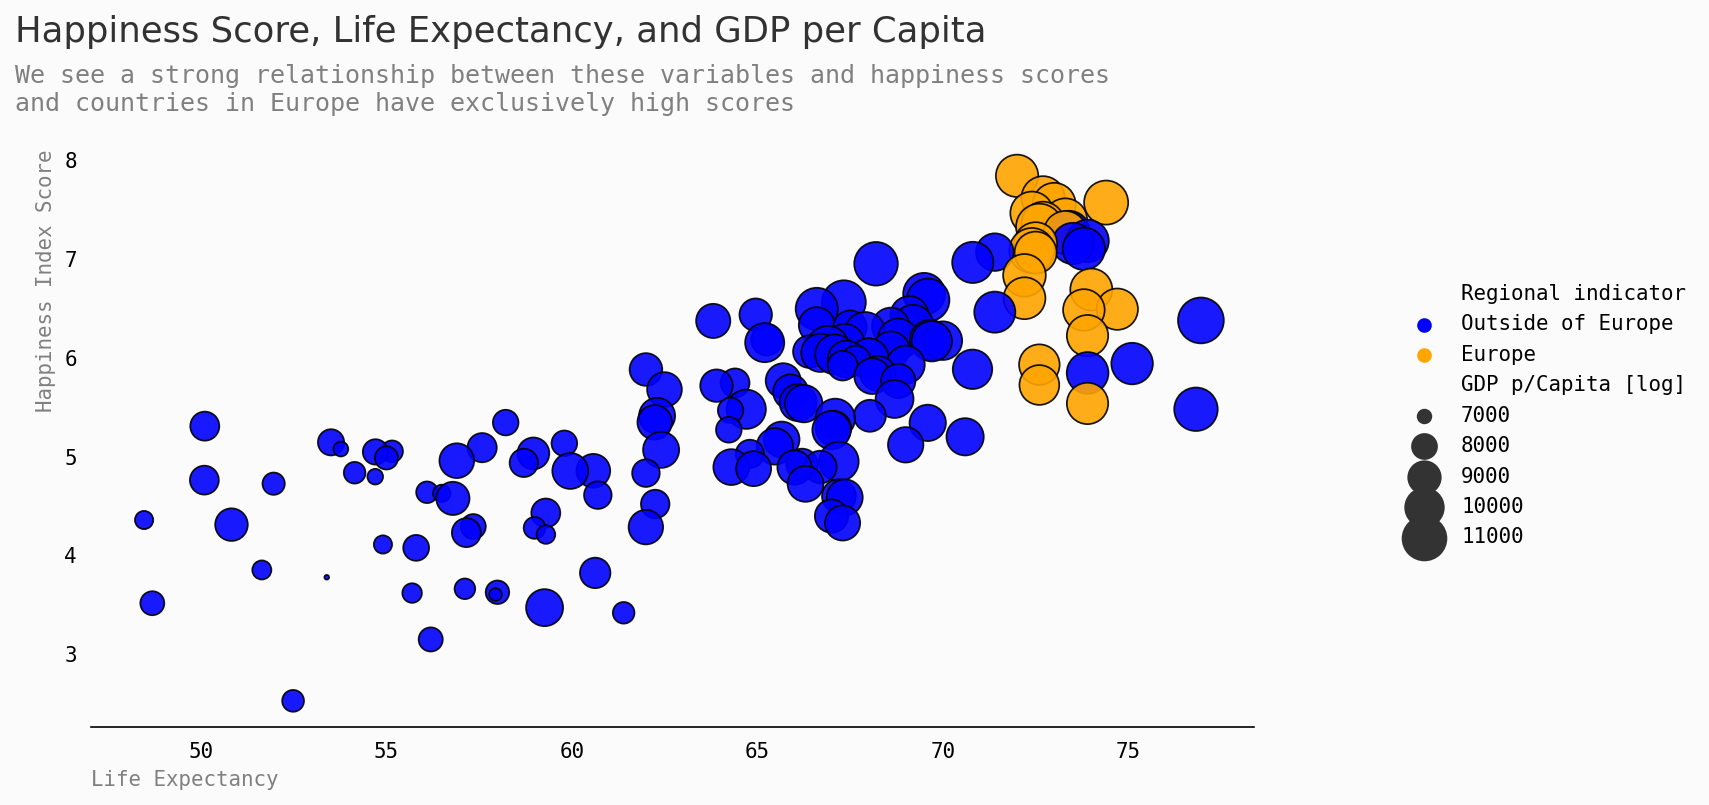

In [27]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',size=df["Logged GDP per capita"]*1000, legend=True, sizes=(5, 500))

ax.set_xlabel("Life Expectancy",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(45,9.2,'Happiness Score, Life Expectancy, and GDP per Capita',fontfamily='sans serif',fontweight='normal',fontsize=17,color='#323232')
ax.text(45,8.5,'We see a strong relationship between these variables and happiness scores\nand countries in Europe have exclusively high scores',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')


L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('GDP p/Capita [log]')
ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

Happier countries tend to be those with longer life expectancies, and a higher GDP. This is also most of Western Europe.

Let's explicitly highlight Africa now...

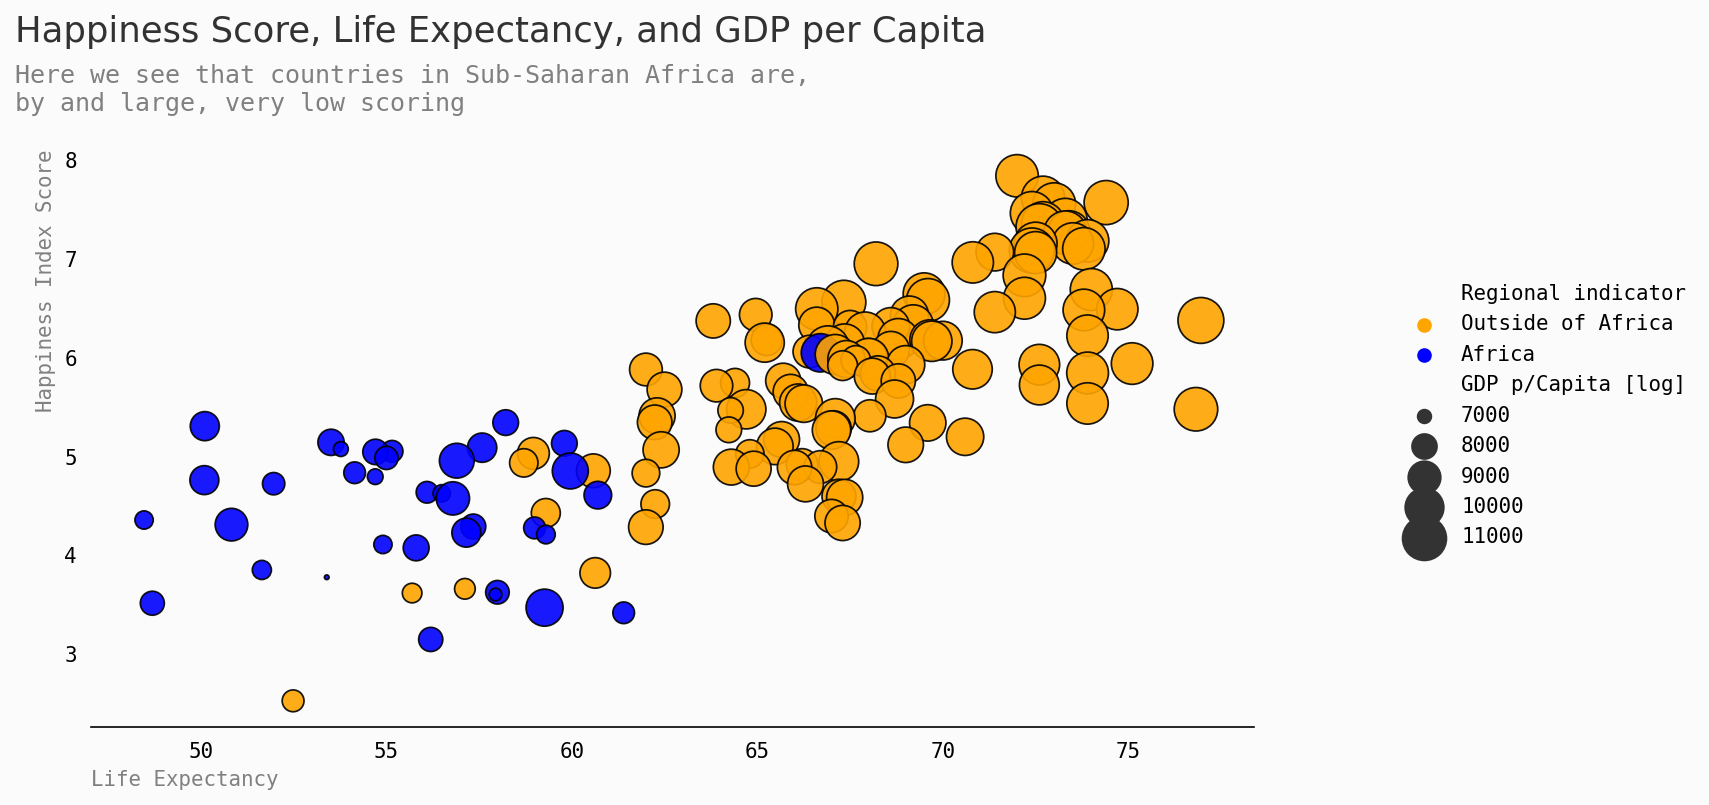

In [28]:
ackground = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [high_c,low_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Healthy life expectancy', y='Ladder score',hue=df['Regional indicator'] == 'Sub-Saharan Africa',palette=cmap, alpha=0.9,ec='black',size=df["Logged GDP per capita"]*1000, legend=True, sizes=(5, 500))

ax.set_xlabel("Life Expectancy",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
ax.text(45,9.2,'Happiness Score, Life Expectancy, and GDP per Capita',fontfamily='sans serif',fontweight='normal',fontsize=17,color='#323232')
ax.text(45,8.5,'Here we see that countries in Sub-Saharan Africa are,\nby and large, very low scoring',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')



L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Africa')
L.get_texts()[2].set_text('Africa')
L.get_texts()[3].set_text('GDP p/Capita [log]')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

By and large, African countries have lower life expectancy, a lower GDP, and ultimately, lower happiness index scores.

### Other factors<br>
So GDP & Life expactancy are factors. What else can be considered?

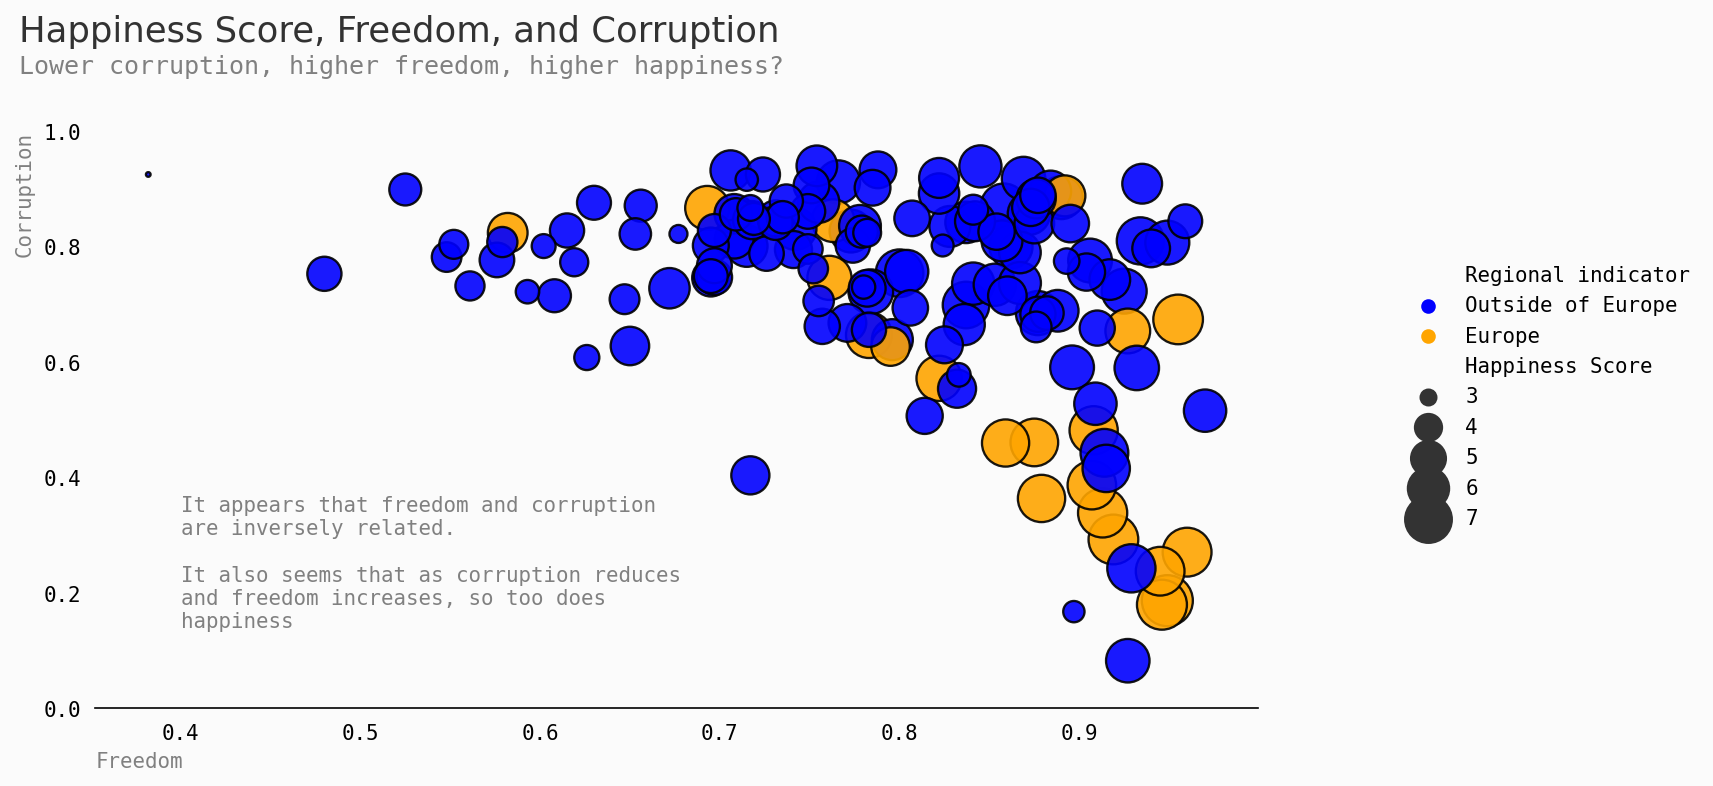

In [29]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Freedom to make life choices', y='Perceptions of corruption',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',size=df["Ladder score"], legend=True, sizes=(5, 600))

ax.set_xlabel("Freedom",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Corruption",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('Happiness Score')

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(0, end+0.2, 0.2))



ax.text(0.31,1.155,'Happiness Score, Freedom, and Corruption',fontfamily='sans serif',fontweight='normal',fontsize=17,color='#323232')
ax.text(0.31,1.1,'Lower corruption, higher freedom, higher happiness?',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')


ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 
ax.text(0.4,0.1,
'''
It appears that freedom and corruption
are inversely related. 

It also seems that as corruption reduces
and freedom increases, so too does
happiness
''',fontfamily='monospace',fontsize=10,color='gray')

plt.show()

### Differences between those above & below the mean happiness level
Let's plot all many features at once, split by the mean happiness level. The happiest countries are, as always, shown in green.

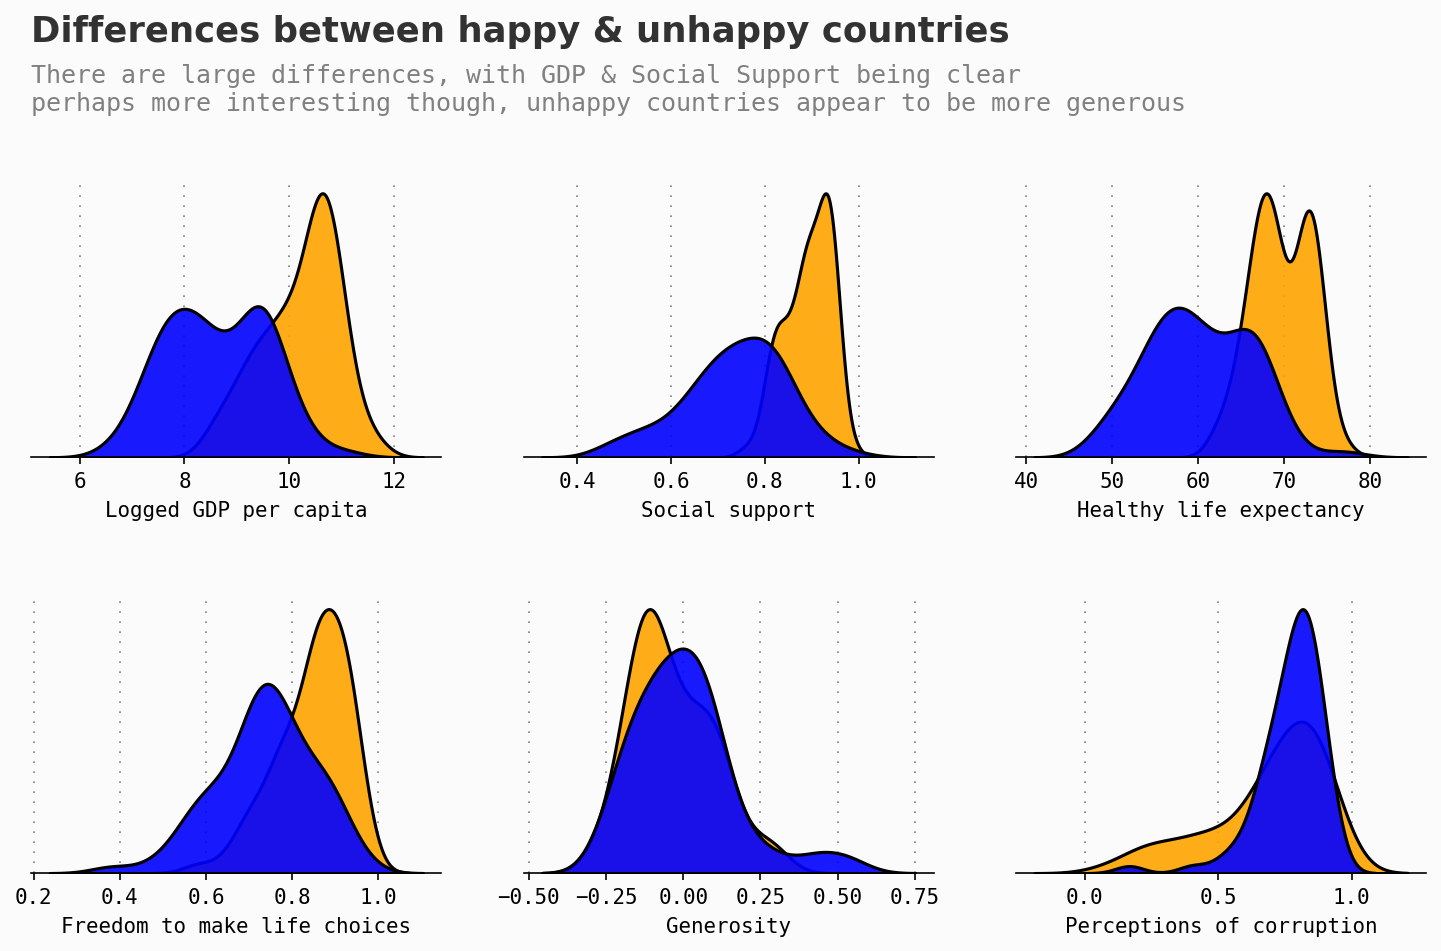

In [30]:
continuous = ['Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']
background_color = '#fbfbfb'
fig = plt.figure(figsize=(12, 6), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.5)


plot = 0
for row in range(0, 2):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        locals()["ax"+str(plot)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
Yes = df[df['lower_happy'] == 1]
No = df[df['lower_happy'] == 0]

for variable in continuous:
        sns.kdeplot(Yes[variable], ax=locals()["ax"+str(plot)], color=high_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=9, legend=False)
        sns.kdeplot(No[variable],ax=locals()["ax"+str(plot)], color=low_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=9, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(plot)].set_xlabel(variable, fontfamily='monospace')
        plot += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.5), 'Differences between happy & unhappy countries', fontsize=17, fontweight='bold', fontfamily='sans serif',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.25), 'There are large differences, with GDP & Social Support being clear\nperhaps more interesting though, unhappy countries appear to be more generous', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')

plt.show()

## A global view
We've now seen clear differences between countries based on severla factors.

Let's see this globally

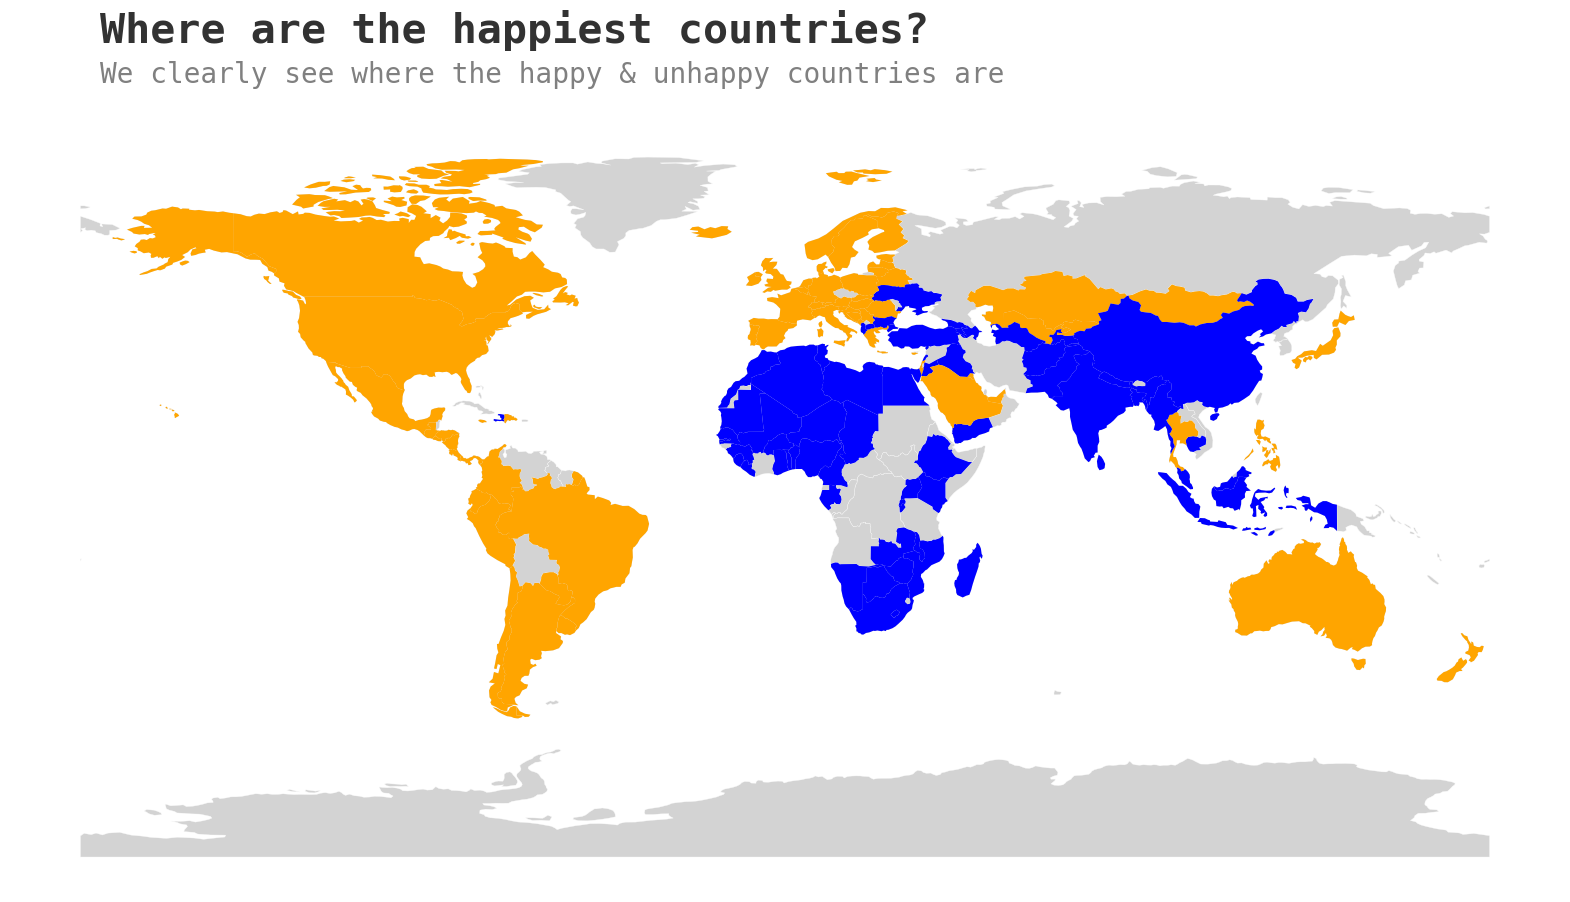

In [31]:
import geopandas
import matplotlib.colors
import pycountry 

#data prep

geo_temp = df



#source: https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
geo_temp['CODE']=alpha3code(geo_temp['Country'])


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
merge=pd.merge(world,geo_temp,on='CODE')


###

# Custom colour map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [low_c,high_c])
ax = world.plot(figsize=(20,15), linewidth=0.25, edgecolor=background_color, color='lightgray')
ax.axis('off')
ax.set_facecolor(background_color)
merge.plot(column='lower_happy',figsize=(20, 15),legend=False,cmap=cmap,ax=ax)


ax.text(-175,112,'Where are the happiest countries?',fontsize=30,fontweight='bold',color='#323232')
ax.text(-175,102,'We clearly see where the happy & unhappy countries are',color='gray',fontfamily='monospace',fontsize=20)

plt.show()


## Population
Let's bring in some more factors - such as population.

Does this imapct happiness levels?



In [32]:
# merge on country
df = pd.merge(df, pop, on='Country')
# removing NA value

df=df[df['Urban Pop %'] != 'N.A.']

# Changing data types, removing % strings etc

df['Urban Pop %'] = df['Urban Pop %'].str.rstrip('%').astype('float') / 100.0
df['World Share'] = df['World Share'].str.rstrip('%').astype('float') / 100.0
df['Yearly Change'] = df['Yearly Change'].str.rstrip('%').astype('float') / 100.0
df['Fert. Rate'] = df['Fert. Rate'].astype('float')
df['Med. Age'] = df['Med. Age'].astype('float')

# Adding in some bins
df['Count'] = 1
df['pop_quantile'] = pd.qcut(df['Population (2020)'], 10, labels=False)
df['density_quantile'] = pd.qcut(df['Density (P/Km²)'], 10, labels=False)

merge_safety = df


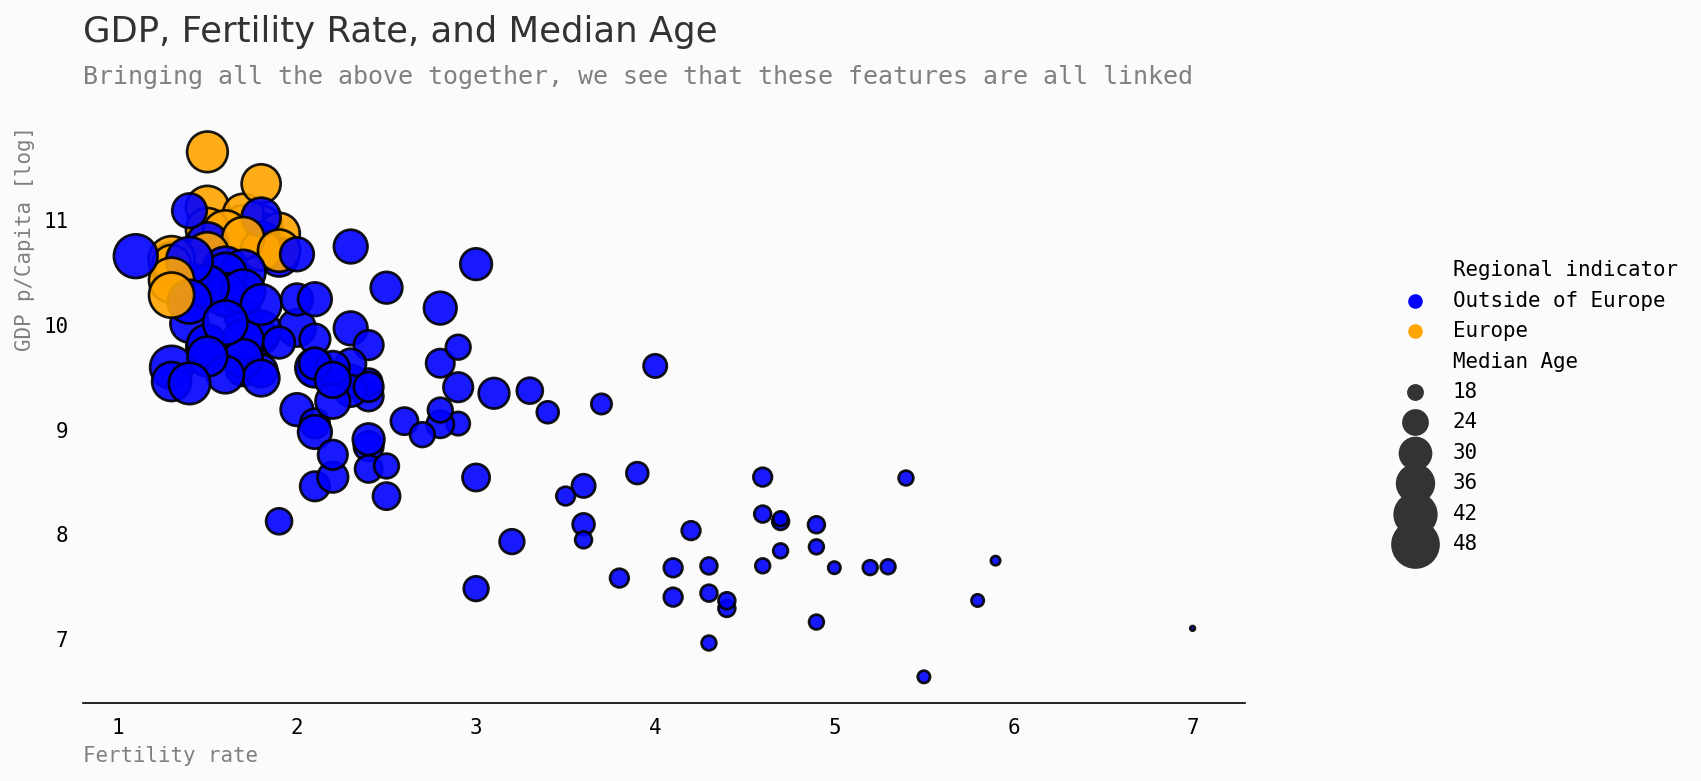

In [33]:


background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Fert. Rate', y='Logged GDP per capita',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',linewidth=1.3,size=df["Med. Age"], legend=True, sizes=(5, 500))

ax.set_xlabel("Fertility rate",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("GDP p/Capita [log]",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

start, end = ax.get_xlim()
    
ax.text(start,12.7,'GDP, Fertility Rate, and Median Age',fontfamily='sans serif',fontweight='normal',fontsize=17,color='#323232')
ax.text(start,12.3,'Bringing all the above together, we see that these features are all linked',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')


L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.25, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('Median Age')
#L.get_texts()[4].set_text('   25m')

ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()

We see clearly that happier countries tend to be **older, and less populous.**

I've included Europe for reference.

#### What about Fertility rate?

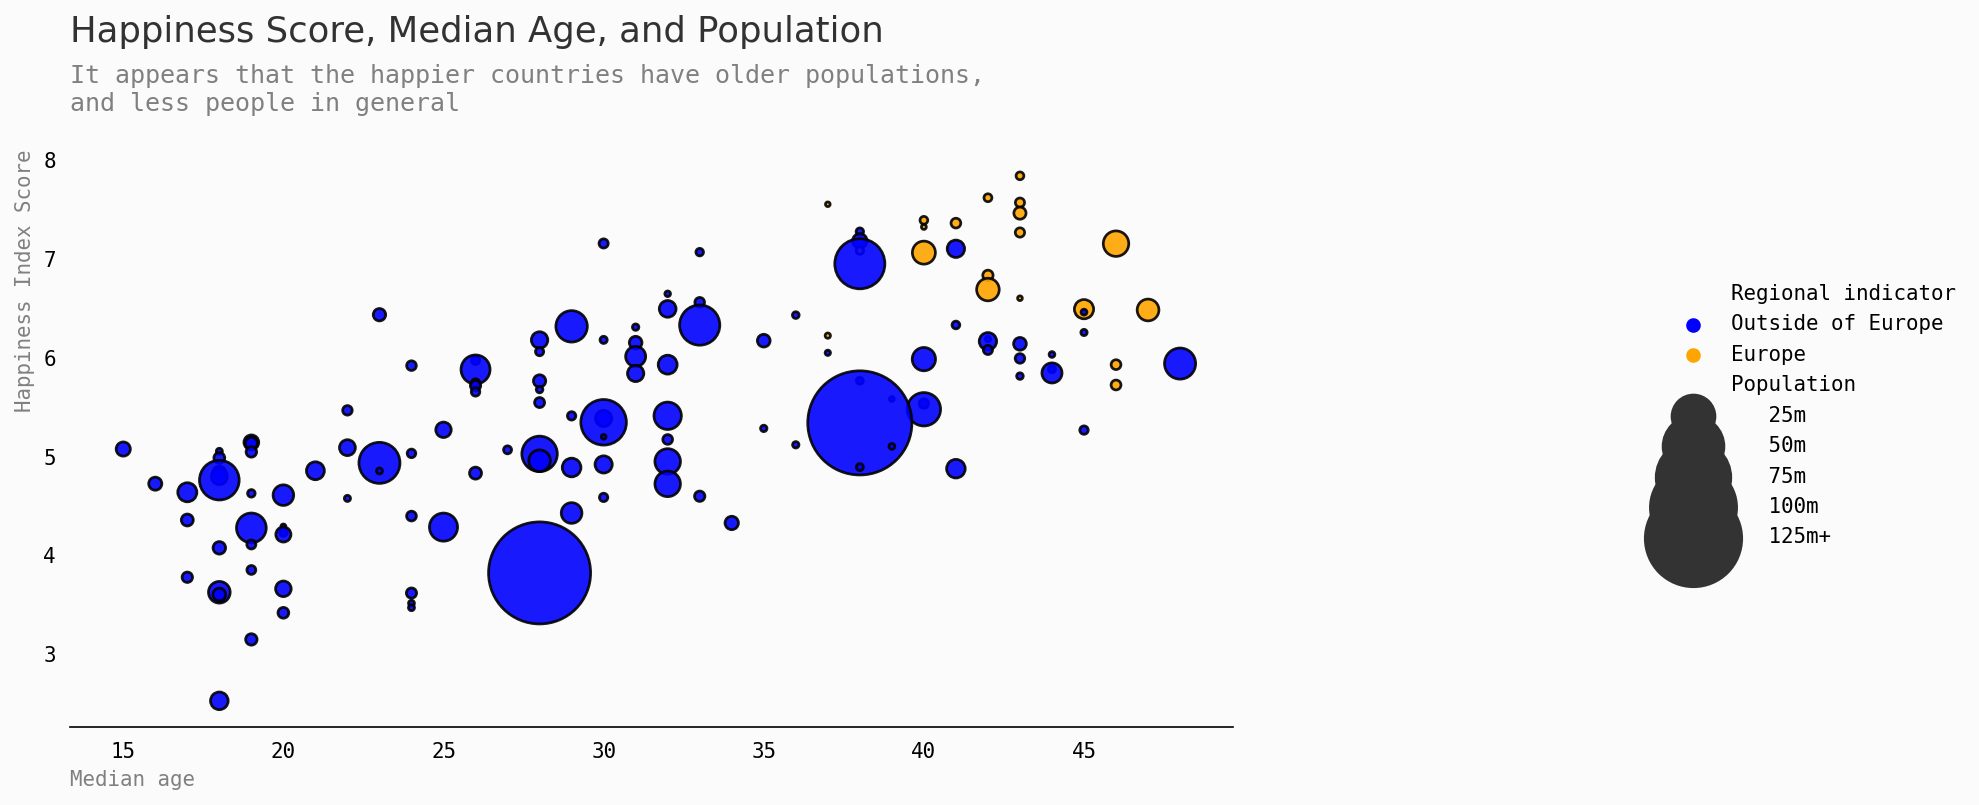

In [34]:
background = "#fbfbfb"

fig, ax = plt.subplots(1,1, figsize=(10, 5),dpi=150)
fig.patch.set_facecolor(background) # figure background color

cmap = [low_c,high_c]

ax.set_facecolor(background)
sns.scatterplot(data=df, x='Med. Age', y='Ladder score',hue=df['Regional indicator'] == 'Western Europe',palette=cmap, alpha=0.9,ec='black',linewidth=1.3,size=df["Population (2020)"]*1000, legend=True, sizes=(5, 2500))

ax.set_xlabel("Median age",fontfamily='monospace',loc='left',color='gray')
ax.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)

start, end = ax.get_xlim()
    
ax.text(start,9.2,'Happiness Score, Median Age, and Population',fontfamily='sans serif',fontweight='normal',fontsize=17,color='#323232')
ax.text(start,8.5,'It appears that the happier countries have older populations,\nand less people in general',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')


L = ax.legend(frameon=False,loc="upper center", bbox_to_anchor=(1.5, 0.8), ncol= 1)
plt.setp(L.texts, family='monospace')
L.get_frame().set_facecolor('none')
L.get_texts()[1].set_text('Outside of Europe')
L.get_texts()[2].set_text('Europe')
L.get_texts()[3].set_text('Population')
L.get_texts()[4].set_text('   25m')
L.get_texts()[5].set_text('   50m')
L.get_texts()[6].set_text('   75m')
L.get_texts()[7].set_text('   100m')
L.get_texts()[8].set_text('   125m+')
ax.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 

plt.show()




I am surprised that population density doesn't effect happiness - though that is due to personal preferences!

#### Have there been changes over time?
Do the unhappy get happier?

Is this just a snapshot of a moment in time? Or are the trends more long-standing?

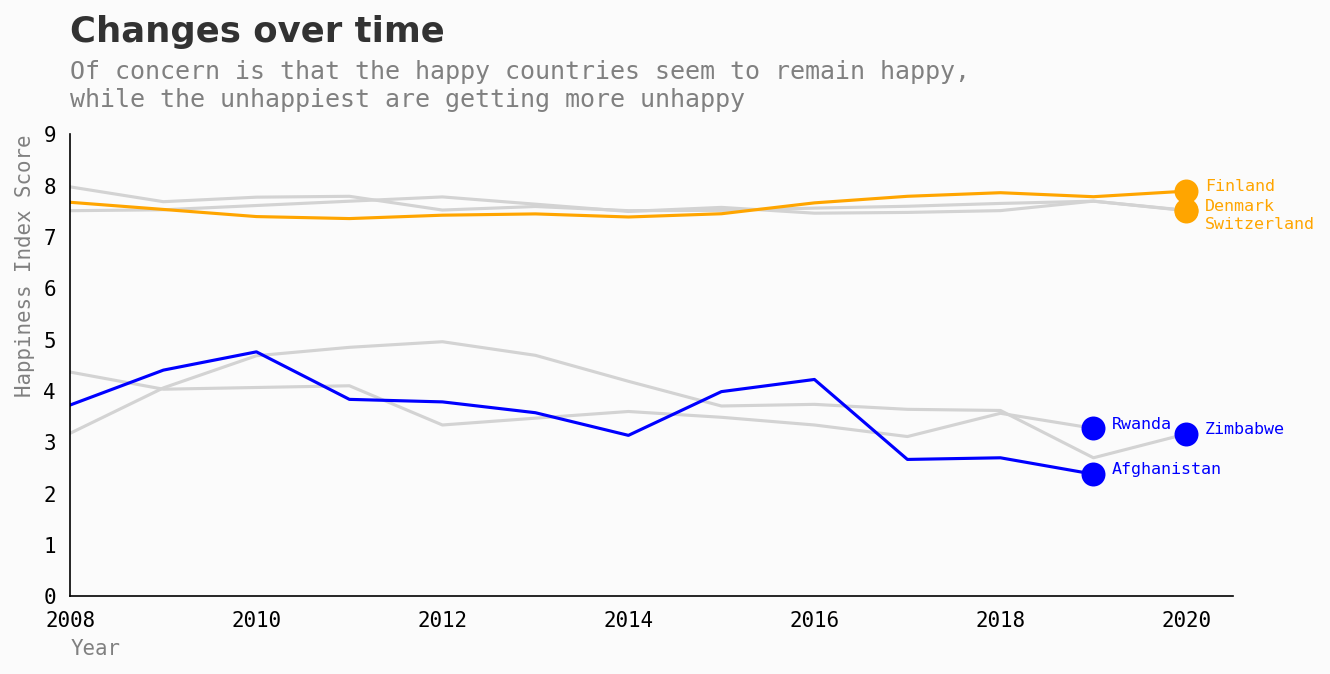

In [35]:
import matplotlib.dates as mdates


fig = plt.figure(figsize=(10, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_xlabel("Year",fontfamily='monospace',loc='left',color='gray')
ax0.set_ylabel("Happiness Index Score",fontfamily='monospace',loc='top',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax0.tick_params(axis='both', which='both', left=False, bottom=False,labelbottom=True) 

#low
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Zimbabwe')], x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Rwanda')], x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Afghanistan')], x='year', y='Life Ladder',color=low_c)

#high
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Denmark')], x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Switzerland')], x='year', y='Life Ladder',color='lightgray')
sns.lineplot(ax=ax0,data=df2[(df2['Country']=='Finland')], x='year', y='Life Ladder',color=high_c)
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.plot(2019,df2[(df2['Country']=='Afghanistan')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Zimbabwe')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)
ax0.plot(2019,df2[(df2['Country']=='Rwanda')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=low_c, markeredgewidth=1.5)

ax0.plot(2020,df2[(df2['Country']=='Finland')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=high_c,markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Denmark')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=high_c, markeredgewidth=1.5)
ax0.plot(2020,df2[(df2['Country']=='Switzerland')]['Life Ladder'].reset_index().iloc[-1,-1], 'ko', markersize=10, fillstyle='full',color=high_c, markeredgewidth=1.5)


ax0.text(2020.2,df2[(df2['Country']=='Finland')]['Life Ladder'].reset_index().iloc[-1,-1],'Finland',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Denmark')]['Life Ladder'].reset_index().iloc[-1,-1],'Denmark',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Switzerland')]['Life Ladder'].reset_index().iloc[-1,-1]-0.35,'Switzerland',color=high_c,fontfamily='monospace',fontsize=8, rotation=0)

ax0.text(2019.2,df2[(df2['Country']=='Afghanistan')]['Life Ladder'].reset_index().iloc[-1,-1],'Afghanistan',color=low_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2020.2,df2[(df2['Country']=='Zimbabwe')]['Life Ladder'].reset_index().iloc[-1,-1],'Zimbabwe',color=low_c,fontfamily='monospace',fontsize=8, rotation=0)
ax0.text(2019.2,df2[(df2['Country']=='Rwanda')]['Life Ladder'].reset_index().iloc[-1,-1],'Rwanda',color=low_c,fontfamily='monospace',fontsize=8, rotation=0)



ax0.yaxis.set_ticks(np.arange(0, 10, 1))
ax0.set_xlim(left = 2008, right = 2020.5)
plt.xticks(fontname = "monospace")
plt.yticks(fontname = "monospace")

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart, Yend+(Yend*0.2), 'Changes over time', fontsize=17, fontweight='bold', fontfamily='sans serif',color='#323232')
ax0.text(Xstart, Yend+(Yend*0.06), 
'''
Of concern is that the happy countries seem to remain happy, 
while the unhappiest are getting more unhappy''', fontsize=12, fontweight='light', fontfamily='monospace',color='gray')
plt.show()

Of concern here is that the **unhappy stay unhappy, and worse still, they appear to be getting unhappier.**



Let's compare the biggest gainer & the biggest loser in terms of the happiness index scores: Bulgaria & Jordan.

We'll compare how they both got on over the years

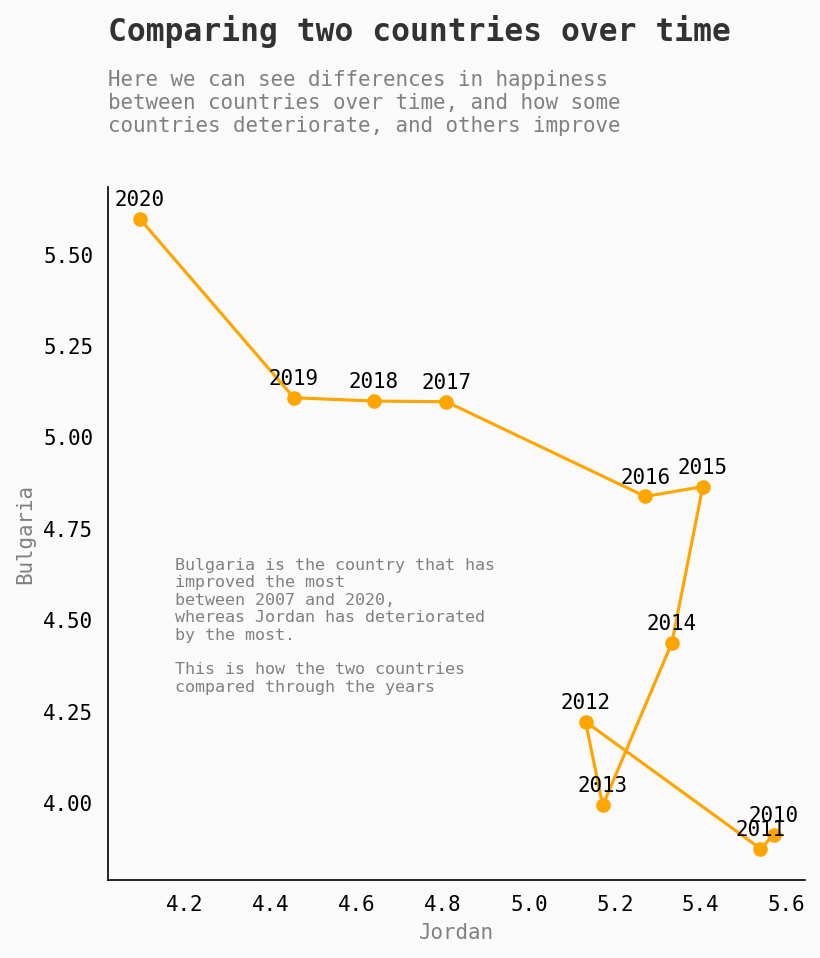

In [36]:
fig = plt.figure(figsize=(6,6),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.05, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])


background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

c1 = 'Jordan'
c2 = 'Bulgaria'

# filter data
df = df2.loc[(df2['Country']==c1) | (df2['Country']==c2)]
df = df2.loc[(df2['year']>2008)]
df = pd.pivot_table(df, values='Life Ladder', index=['year'], columns=['Country'])


# plot the connected scatterplot
plt.plot(df[c1], df[c2], '-', marker='o',color=high_c)

# add annotations in every 3 data points with a loop
for line in range(0, df.shape[0], 1):
     plt.annotate(
          df.index[line], 
          (df[c1].iloc[line], df[c2].iloc[line]+0.025) ,
          va='bottom',
          ha='center',fontfamily='monospace'
     )
        

for s in ['top','right']:
    ax0.spines[s].set_visible(False)
    
#ax0.xaxis.set_ticks(np.arange(1, 10, 1))
ax0.set_ylabel(f"{c2}",fontfamily='monospace',loc='top',color='gray')
ax0.set_xlabel(f"{c1}",fontfamily='monospace',loc='left',color='gray')
ax0.tick_params(axis = 'both', which = 'major', labelsize = 10)
    

ax0.tick_params(axis='both', which='both',left=False, bottom=False,labelbottom=True) 


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0.text(Xstart,Yend+0.4,'Comparing two countries over time',fontsize=15,fontweight='bold',color='#323232')
ax0.text(Xstart,Yend+0.15,'Here we can see differences in happiness\nbetween countries over time, and how some\ncountries deteriorate, and others improve',fontsize=10,fontfamily='monospace',color='gray')
fig.text(0.2,0.3,
'''
Bulgaria is the country that has
improved the most 
between 2007 and 2020, 
whereas Jordan has deteriorated 
by the most. 

This is how the two countries
compared through the years
''',fontfamily='monospace',fontsize=8,color='gray')

# x axis label
plt.xlabel(c1)

# y axis label
plt.ylabel(c2)

# show the graph
plt.show()


Whilst I explore this idea of temporal change, I want to look at a continental perspective.

For example, are all countries in Western Europe 'happy'?

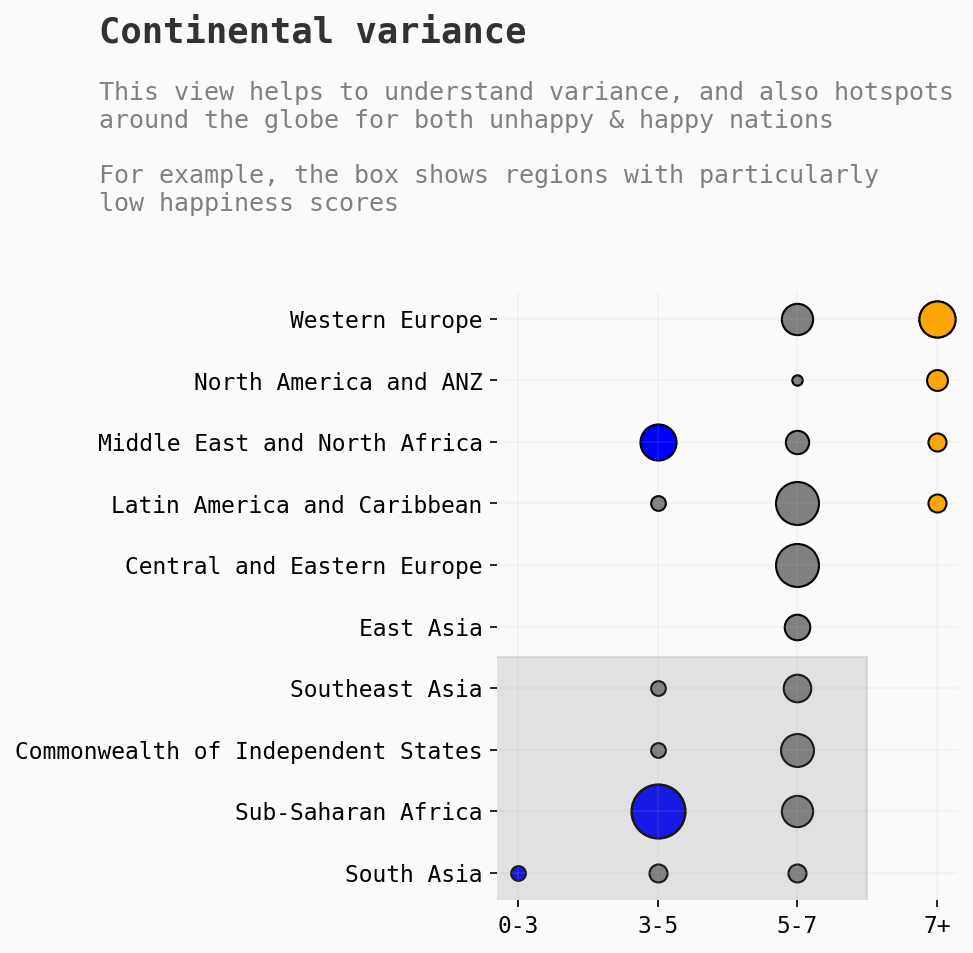

In [37]:
safety['bin'] = safety['Ladder score'].apply(lambda x: '0-3' if x <= 3 else '3-5' if x <= 5 else '5-7' if x <= 7 else '7+')

bin_order = ['0-3','3-5','5-7','7+']

cont_order = ['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia']

safety['count'] = 1

# matrix plot

data_matrix = pd.pivot_table(safety, values='count', index=['Regional indicator'], columns=['bin'], aggfunc=np.sum).fillna(0).astype(int).loc[cont_order, bin_order].stack()
plt.rcParams["font.family"] = "monospace"

fig = plt.figure(figsize=(5, 9), dpi=150)
gs = fig.add_gridspec(5, 5)
ax0 = fig.add_subplot(gs[1:4, 0:4]) 
background_color = "#fafafa"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

for item in cont_order[::-1]:
    for item_2 in bin_order:
        size = data_matrix[item][item_2]
        ax0.scatter(item_2, item, s=size*25, color='gray',ec='black',linewidth=1) 

#highlights
ax0.scatter(1, 1, s=650, color=low_c,ec='black',linewidth=1,alpha=1)    
ax0.scatter(0, 0, s=50, color=low_c,ec='black',linewidth=1,alpha=1) 
ax0.scatter(1, 7, s=300, color=low_c,ec='black',linewidth=1,alpha=1)
ax0.scatter(3, 9, s=300, color=high_c,ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 8, s=100, color=high_c,ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 7, s=75, color=high_c,ec='black',linewidth=1,alpha=1) 
ax0.scatter(3, 6, s=75, color=high_c,ec='black',linewidth=1,alpha=1) 

ax0.grid(linewidth=0.1)        
ax0.set_xticklabels(bin_order, fontsize=11, rotation=0)
plt.yticks(fontsize=11)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
ax0.text(-3,13.5,'Continental variance',fontsize=17,weight='bold',color='#323232')
ax0.text(-3,10.3,
'''
This view helps to understand variance, and also hotspots
around the globe for both unhappy & happy nations

For example, the box shows regions with particularly
low happiness scores
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray') 
#rect

X, Y = -0.5, -0.5


ax0.add_patch(Rectangle((X, Y), 3, 4,alpha=0.2, edgecolor='gray',facecolor='gray'))
plt.show()

Europe though seems almost exclusively without worry. Is this true? Doubtful.

Let's explore Europe a little more... through the heatmap

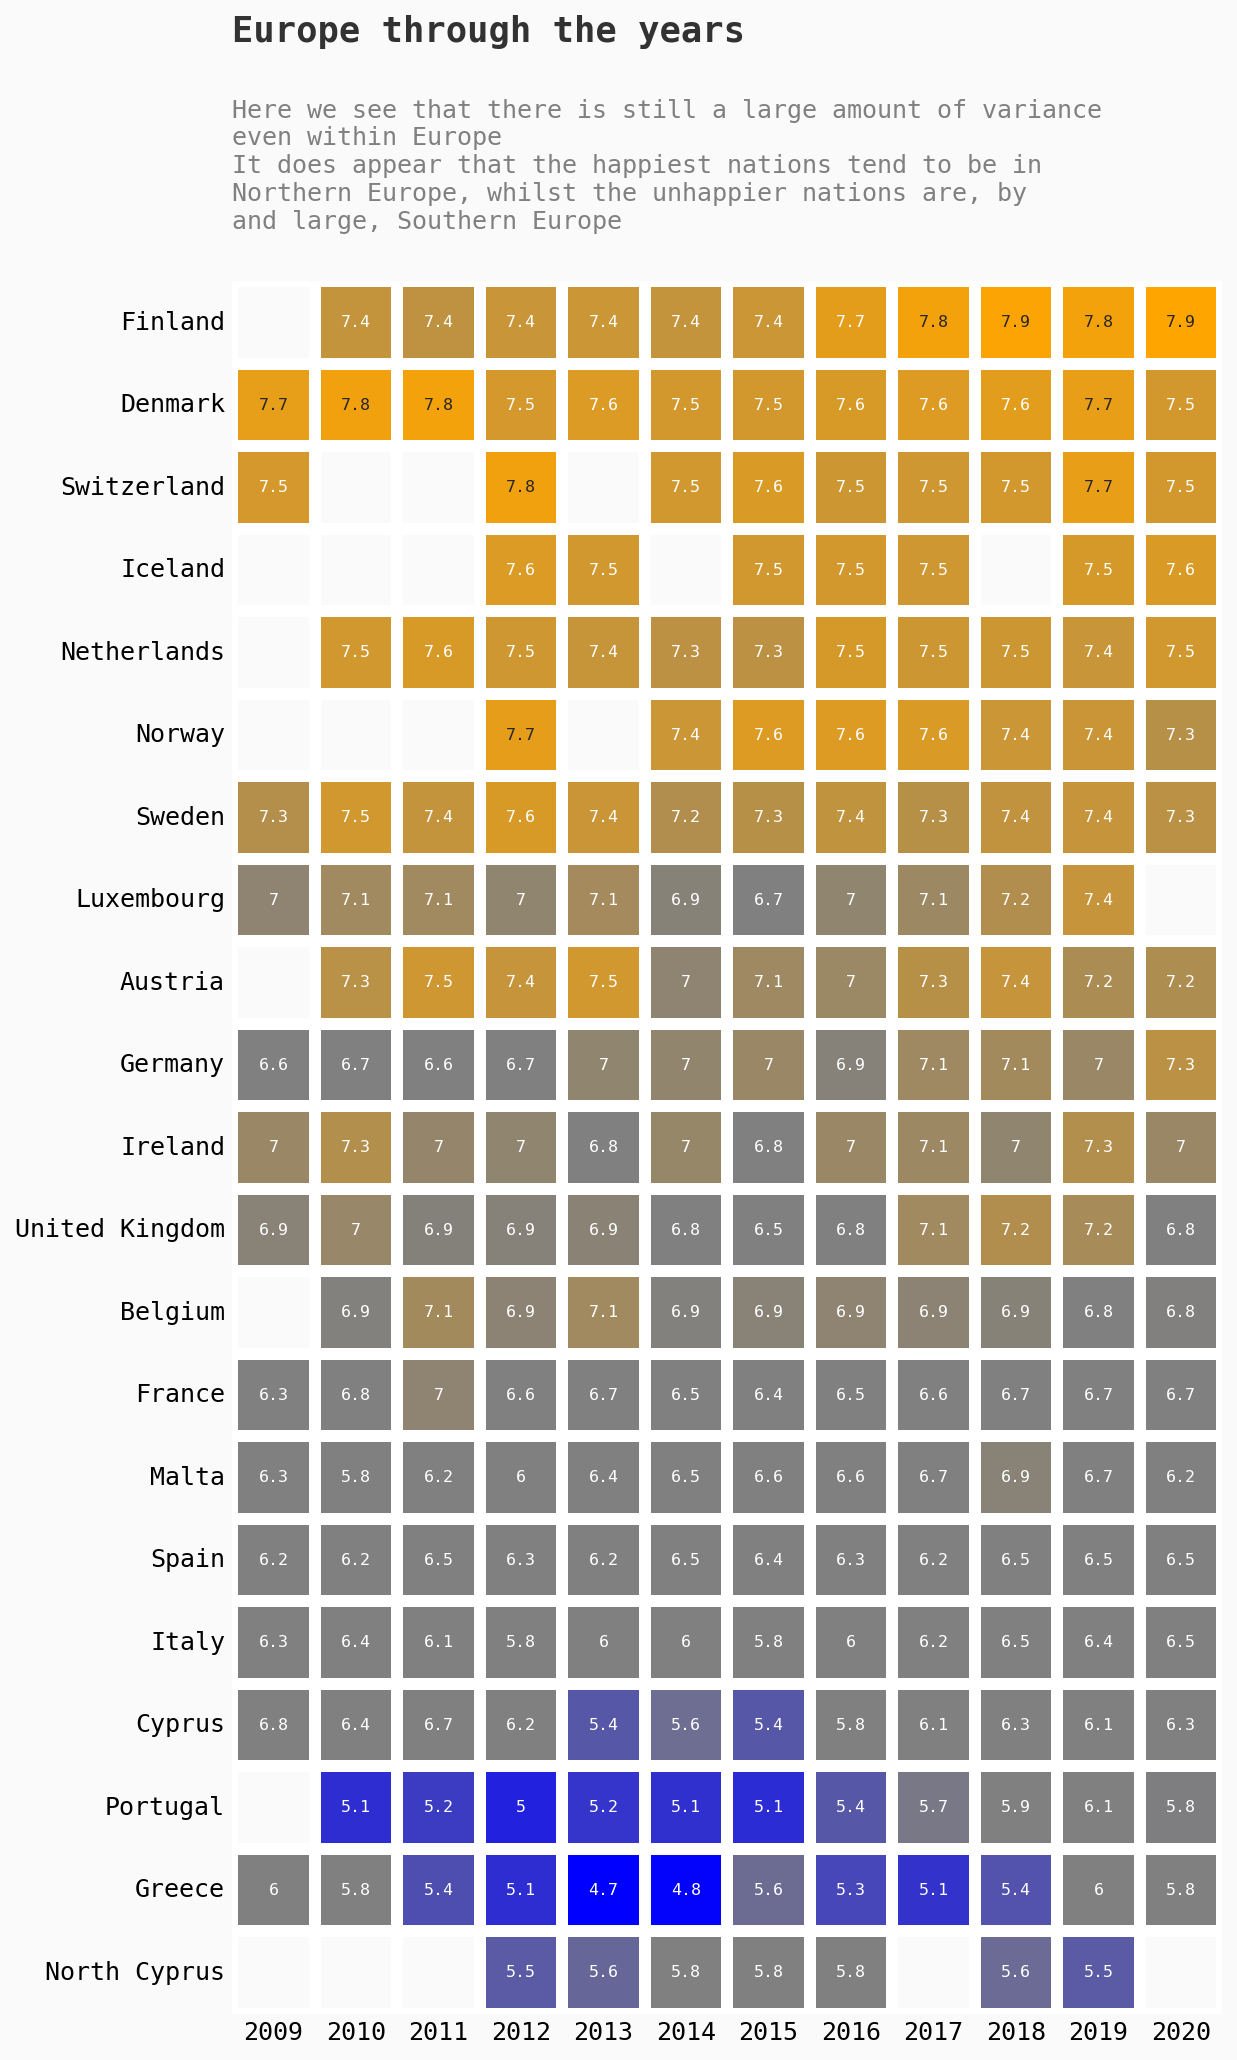

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=150, facecolor=background_color)
ax.set_facecolor(background_color) 

plt.rcParams["font.family"] = "monospace"


colors = [low_c,'gray','gray',high_c]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(df[list(safety[safety['Regional indicator'] == 'Western Europe']['Country name'])].T, 
            square=True,
            linewidth=5, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True,annot_kws={"size": 8})
ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(rotation=0,fontfamily='monospace',size=12)
plt.xticks(rotation=0,fontfamily='monospace', size=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.text(0,-2.9,'Europe through the years',fontsize=17,weight='bold',color='#323232')
ax.text(0,-0.3,
'''
Here we see that there is still a large amount of variance
even within Europe
It does appear that the happiest nations tend to be in
Northern Europe, whilst the unhappier nations are, by 
and large, Southern Europe
''',fontfamily='monospace',fontweight='light',fontsize=12,color='gray')

plt.show()


**Conclusions**<br>
We see that there are many clear distinctions between happy and unhappy countries - at least at the extremes.

Generally, happier countries tend to:

be wealthier

be less populous

have fewer children

be older

be less corrupt

be more free

have a lot of social support

We also know that, generally, the happy stay happy, and the unhappy are getting unhappier.

However, as we have seen with Bulgaria - this does not have to be the case. Bulgaria improved by over 1.5 points between 2007 and 2020 - the most of any country. So there is hope that unhappy countries can break the historic trends.

Lastly, we clustered the data, using K-means and the elbow method. This enables us again to easily visualise and inderstand the differences between nations, and what features lead to high or low happiness index scores.